In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import gzip
import json
import time
import pickle 

# load model data from file
def load_pickle(path):
    file = open(path, 'rb')
    data = pickle.load(file)
    file.close()
    return data

# save model data to pickle file
def save_pickle(data, path):
    file = open(path, 'wb')
    pickle.dump(data, file)
    file.close()

In [5]:
# 从jason文件提取数据
raw_datas = []
raw_words=[]
raw_labels=[]
status_cnt = {}
language_cnt = {}

i = 0

for line in gzip.open('/home/lupeng/neural-network/data/out.json.gz', mode='r'):
    i = i+1
    raw = json.loads(line.decode())
    if((raw['language'].startswith('GNU')==False) and (raw['language'] != 'MS C++')): 
        continue;
    tokens = [el.strip() for el in raw['source'] if el!=' '] #去掉空格
    
    if raw['status'] == 'Accepted':
        raw_datas.append(tokens)
        raw_words.extend(tokens)
        raw_labels.append(1)
    elif raw['status'].startswith('Runtime error'):
        raw_datas.append(tokens)
        raw_words.extend(tokens)
        raw_labels.append(0)
        res=""
        for token in tokens:
            res+=token+' '
        print(res)
        break
    
    # status count    
    splits = raw['status'].split()
    key = ''
    if(len(splits)==1):
        key = splits[0]
    else:
        key = splits[0]+' '+splits[1]
        
    status_cnt[key] = status_cnt.get(key,0)+1
    # language count
    language_cnt[raw['language']]= language_cnt.get(raw['language'],0)+1
    if i%10000 == 0 :
        print('process line %d'%i)  

< cstdio > #include < vector > using namespace std ; const int nmax = -NUMBER- ; int a [ nmax + -NUMBER- ] [ nmax + -NUMBER- ] ; vector < int > v [ nmax + -NUMBER- ] ; int find_smallest ( int x , int y ) { int pos = - -NUMBER- ; int Min = -NUMBER- ; for ( int i = -NUMBER- ; i < v [ x ] . size ( ) ; i + + ) if ( v [ x ] [ i ] ! = y ) if ( a [ v [ x ] [ i ] ] [ y ] ) { if ( v [ v [ x ] [ i ] ] . size ( ) < Min ) { Min = v [ v [ x ] [ i ] ] . size ( ) ; pos = v [ x ] [ i ] ; } } return pos ; } int main ( ) { freopen ( test.in , r , stdin ) ; int n , m ; scanf ( %d%d , & n , & m ) ; for ( int i = -NUMBER- ; i < m ; i + + ) { int x , y ; scanf ( %d%d , & x , & y ) ; a [ x ] [ y ] = true ; a [ y ] [ x ] = true ; v [ x ] . push_back ( y ) ; v [ y ] . push_back ( x ) ; } int ans = -NUMBER- ; bool ok = false ; for ( int i = -NUMBER- ; i < = n ; i + + ) { for ( int j = -NUMBER- ; j < v [ i ] . size ( ) ; j + + ) { int pos = find_smallest ( i , v [ i ] [ j ] ) ; if ( pos ! = - -NUMBER- ) { ok = t

In [16]:
import collections
cnt=collections.Counter(raw_words).most_common(len(raw_words))
print('辞典个数:%d'%len(cnt))
dictionary={}
reverse_dictionary={}

for word, _ in cnt:
    idx = len(dictionary)
    dictionary[word] = idx
    reverse_dictionary[idx]=word

for data in raw_datas:
    for i in range(len(data)):  
        data[i] = dictionary[data[i]]
print("datas num:%d"%(len(raw_datas)))

辞典个数:52730
datas num:96638


In [17]:
# save the data 
f = {}
f['datas'] = raw_datas
f['labels'] = raw_labels
save_path = '/home/lupeng/neural-network/data/codeforces_full.pkl'
               
save_pickle(f, save_path)
print('pickle data saved')

pickle data saved


In [18]:
pos_num=0
neg_num=0
for i in range(len(raw_labels)):
    if raw_labels[i] == 1:
        pos_num=pos_num+1
    else:
        neg_num = neg_num+1
print(pos_num)
print(neg_num)
print(status_cnt)
print(language_cnt)

87354
9284
{u'Judgement failed': 2, u'Skipped': 2114, u'Idleness limit': 37, u'Wrong answer': 107962, u'Runtime error': 9284, u'Memory limit': 2359, u'Hacked': 1483, u'Time limit': 24815, u'Accepted': 87354, u'Compilation error': 8838}
{u'GNU C11': 1097, u'GNU C': 6297, u'GNU C++': 113093, u'GNU C++11': 107676, u'MS C++': 16085}


In [42]:
#前100位最
most_freq = cnt[1500:]
print(most_freq)
    

[(u'm%i', 328), (u'repd', 328), (u'SE', 327), (u'MAXK', 326), (u'bid', 326), (u'NUM', 326), (u'get_pref', 325), (u'old', 325), (u'da', 324), (u'__builtin_clz', 324), (u'opt', 324), (u'/STACK:1024000000,1024000000', 324), (u'fru', 323), (u'IntegerIterator', 323), (u'exist', 322), (u'let', 322), (u'idx2', 322), (u'LET', 322), (u'???', 322), (u'RD', 321), (u'pwr', 321), (u'amount', 321), (u'j2', 320), (u'rg', 320), (u'ile', 320), (u'_CRT_SECURE_NO_DEPRECATE', 319), (u'M_PI', 319), (u'det', 318), (u'clock_t', 317), (u'nv', 316), (u'BigMod', 316), (u'%.9f', 316), (u'dad', 316), (u'PR', 315), (u'VLL', 315), (u'binary_power', 315), (u'binary_search', 313), (u'width', 313), (u'av', 313), (u'%I64d %I64d %I64d', 313), (u'bi', 313), (u'event', 313), (u'children', 313), (u'LIM', 312), (u'reserve', 312), (u'letter', 312), (u'myType', 312), (u'DRI', 312), (u'State', 311), (u'%lf %lf', 310), (u'mx2', 310), (u'fast', 310), (u'Find', 310), (u'strcmp', 308), (u'half', 308), (u'bits/stdc++.h', 308), (u'm

total words: 39226259, total dic:52730
[38805441, 118689, 302129]


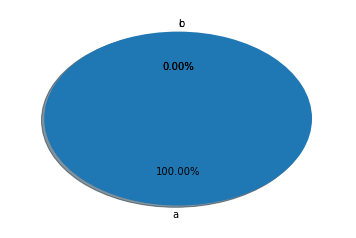

In [37]:
# 词频分布图
total_words = len(raw_words)

print('total words: %d, total dic:%d'%(len(raw_words), len(cnt)))
num = [5000,8000,10000]
sizes = [0,0,0]
labels = ['a','b','c']
i=0
for _,count in cnt:
    i=i+1
    if(i<num[0]):
        sizes[0]+= count
    elif(i<num[1]):
        sizes[1]+=count
    else:
        sizes[2]+=count
print(sizes)
#sizes=sizes[1:]
#labels=labels[1:]
sizes= [size*100/total_words for size in sizes]
import matplotlib.pyplot as plt

plt.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)

plt.show()

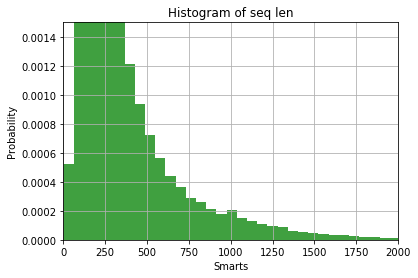

In [38]:
#序列长度分布图
lens = []
index = []
for i in range(len(raw_datas)):
    lens.append(len(raw_datas[i]))
    index.append(i)

    
n,bins,patches=plt.hist(lens,100,normed=1,facecolor='g',alpha=0.75)  
plt.xlabel('Smarts')  
plt.ylabel('Probability')  
plt.title('Histogram of seq len')  
#plt.text(0,.025, r'data len his')  
plt.axis([0,2000,0,0.0015])  
plt.grid(True) 
plt.show()

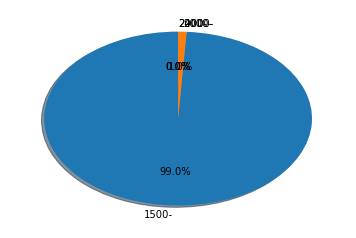

In [41]:
# 数据长度百分比饼状图
ranges = [1500,2000,2400,20000]
labels = ['%d-'%x for x in ranges]
sizes = [0 for x in ranges]

for i in range(len(lens)):
    value = lens[i]
    for j in range(len(ranges)):
        if lens[i]<ranges[j]:
            sizes[j] = sizes[j] + 1
            break
sizes = [size*100/len(lens) for size in sizes]        
import matplotlib.pyplot as plt

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()